In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\htran\Downloads\QueryResults.csv')
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


Rename

In [3]:
df = df.rename(columns={'m': 'DATE', 'TagName': 'TAG', 'Unnamed: 2': 'POSTS'})

In [4]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [5]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

In [6]:
clean = df.dropna()

In [7]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

Group By

In [12]:
clean.groupby('TAG').sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [16]:
clean.DATE[1]

'2008-08-01 00:00:00'

In [18]:
type(clean['DATE'][1])

str

Convert string to datetime datatype

In [19]:
clean.DATE = pd.to_datetime(clean.DATE)
clean.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


Pivot

In [20]:
reshape = clean.pivot(index='DATE', columns='TAG', values='POSTS')

In [21]:
reshape.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [23]:
reshape.shape

(145, 14)

In [24]:
reshape.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

fillna

In [25]:
reshape.fillna(0, inplace=True)

In [26]:
reshape.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


Check if there is any na

In [27]:
reshape.isna().values.any()

False

In [28]:
import matplotlib.pyplot as plt

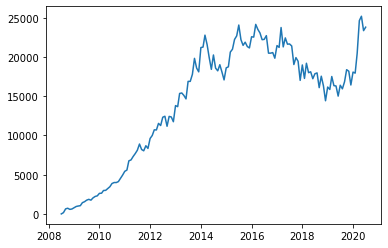

In [29]:
plt.plot(reshape.index, reshape['javascript'])

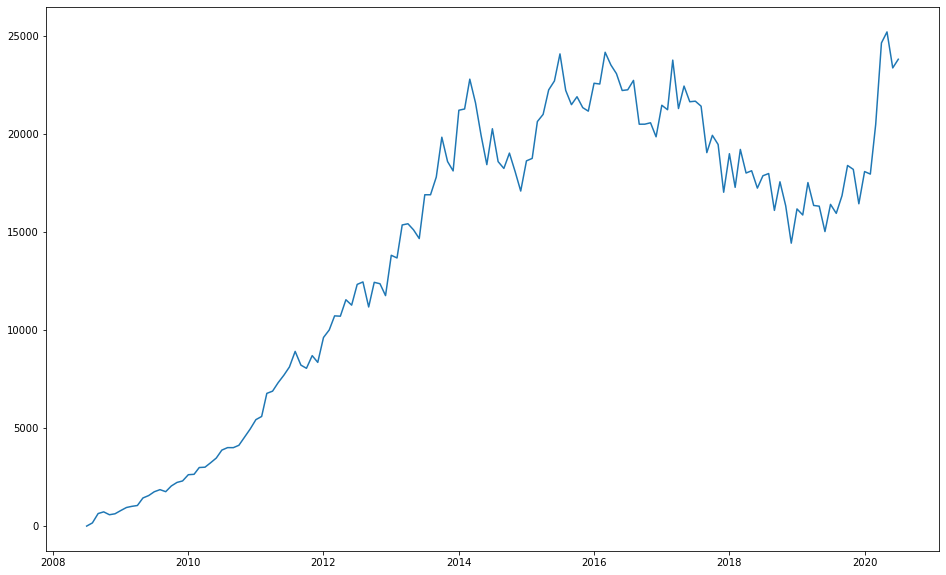

In [31]:
plt.figure(figsize=(16,10))
plt.plot(reshape.index, reshape['javascript'])

Add Label

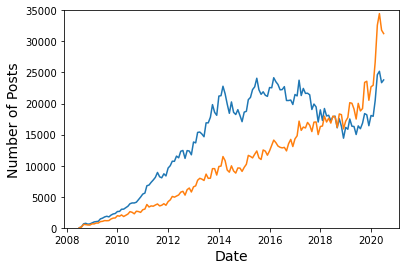

In [41]:
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshape.index, reshape['javascript'], reshape['python'])

Looping

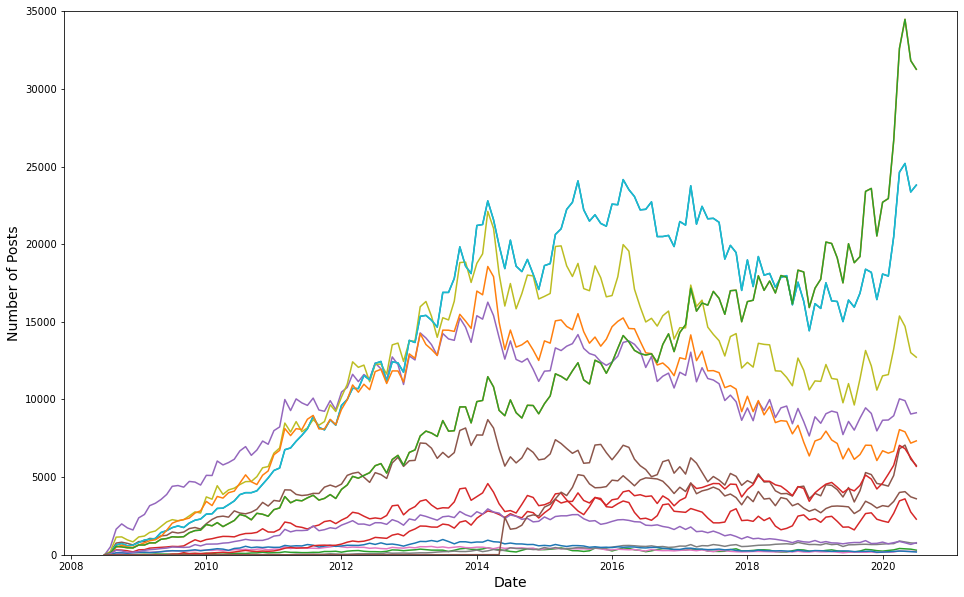

In [40]:
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshape.index, reshape['javascript'], reshape['python'])
for column in reshape.columns:
    plt.plot(reshape.index, reshape[column])

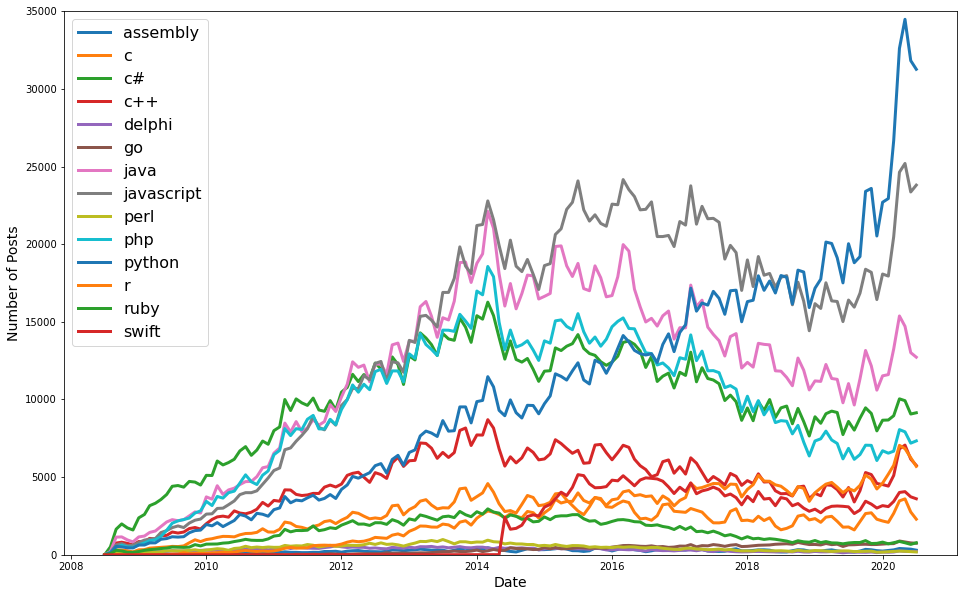

In [45]:
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshape.columns:
    plt.plot(reshape.index, reshape[column], linewidth=3, label=reshape[column].name)
plt.legend(fontsize=16)

Rolling

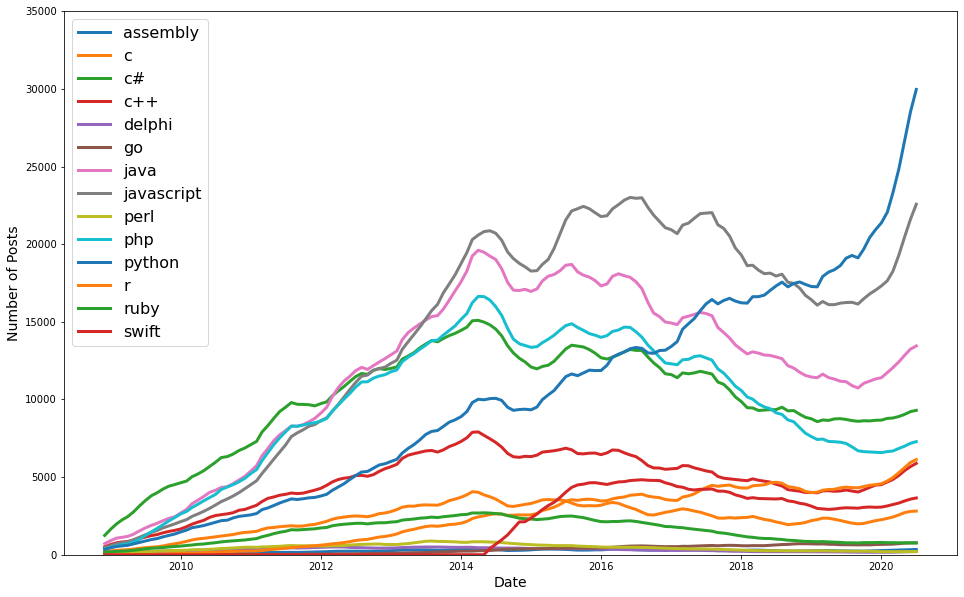

In [47]:
roll = reshape.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll.columns:
    plt.plot(roll.index, roll[column], linewidth=3, label=roll[column].name)
    
plt.legend(fontsize=16)